### Импортируем библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import os

### Наш датасет

In [2]:
breast_cancer = load_breast_cancer()
breast_cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

### Выводим кол-во признаков

In [3]:
breast_cancer.data[0].shape

(30,)

### Сокращаем  кол-во признаков до 2. Таким образом мы уменьшим размерность задачи.

Так же, делим модель на обучающую и тестовую выборку

In [4]:
X = breast_cancer.data
y = breast_cancer.target
X_2d = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_2d, y,
                                                    train_size=0.80,
                                                    random_state=42,
                                                    stratify=y)

### Выводим датасет, в котором мы сократили кол-во признаков до 2

In [5]:
X_2d

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

### Обучаем модель

In [6]:
clf = SVC(C=0.01)

clf.fit(X_train, y_train)

SVC(C=0.01)

### Метрика точности для тестовых и обучающих выборок

In [7]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.6989010989010989
0.7280701754385965


### Делаем предсказание результата класса на основе тестовой выборки

Text(0.5, 15.0, 'Предсказанные значения')

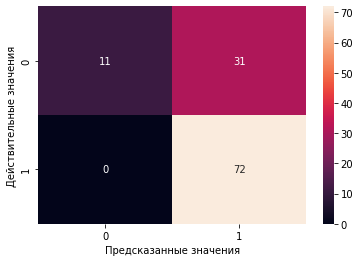

In [8]:
y_pred = clf.predict(X_test)


class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)


sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

#plt.plot(range(10))
# fig.savefig('temp.png', dpi=fig.dpi)
# plt.close(fig)

### Строим графическую зависимость тестовой и обучающей точности от размера обучающей выборки.

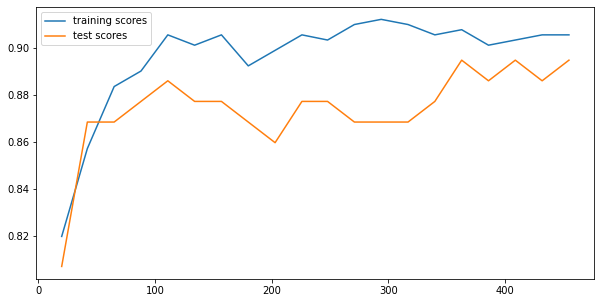

In [9]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(X_train), 20):

    clf = SVC(C=15, kernel='rbf')
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)

    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best");

Альтернативная запись !

In [11]:
#Зависимость качества модели от показателя нормализации
breast_cancer = load_breast_cancer()
X_ = breast_cancer.data
y_ = breast_cancer.target
X_2d = X_[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_2d, y_)


for i in range(-4, 7):
    X_2d = X_[:, :2]
    X_train, X_test, y_train, y_test = train_test_split(X_2d, y_)
    
    r = 10 ** i
    clf = SVC(C=r)
    clf.fit(X_train, y_train)

    print(r, clf.score(X_train, y_train), clf.score(X_test, y_test))

0.0001 0.647887323943662 0.5664335664335665
0.001 0.6408450704225352 0.5874125874125874
0.01 0.6830985915492958 0.7412587412587412
0.1 0.8802816901408451 0.9370629370629371
1 0.9084507042253521 0.9090909090909091
10 0.8990610328638498 0.9230769230769231
100 0.9154929577464789 0.9090909090909091
1000 0.9014084507042254 0.9230769230769231
10000 0.9178403755868545 0.8811188811188811
100000 0.9131455399061033 0.8671328671328671
1000000 0.9107981220657277 0.8741258741258742


In [12]:
#Зависимость качества модели от размера параметров

for i in range(30):
    X_2d = X_[:, :i + 1]
    X_train, X_test, y_train, y_test = train_test_split(X_2d, y_)
    clf = SVC(C=0.01)
    
    clf.fit(X_train, y_train)

    print(i, clf.score(X_train, y_train), clf.score(X_test, y_test))

0 0.823943661971831 0.8321678321678322
1 0.6807511737089202 0.7622377622377622
2 0.6220657276995305 0.6433566433566433
3 0.7699530516431925 0.7972027972027972
4 0.7863849765258216 0.7062937062937062
5 0.7863849765258216 0.7412587412587412
6 0.7464788732394366 0.7552447552447552
7 0.755868544600939 0.7412587412587412
8 0.7394366197183099 0.7132867132867133
9 0.7488262910798122 0.7552447552447552
10 0.7511737089201878 0.7552447552447552
11 0.7230046948356808 0.6853146853146853
12 0.7417840375586855 0.7202797202797203
13 0.7136150234741784 0.7482517482517482
14 0.7535211267605634 0.8041958041958042
15 0.7629107981220657 0.7762237762237763
16 0.7464788732394366 0.8251748251748252
17 0.7183098591549296 0.6713286713286714
18 0.7488262910798122 0.7202797202797203
19 0.7300469483568075 0.6713286713286714
20 0.7652582159624414 0.7762237762237763
21 0.7488262910798122 0.8181818181818182
22 0.7089201877934272 0.6293706293706294
23 0.7910798122065728 0.7902097902097902
24 0.7723004694835681 0.7482

In [13]:
X_2d = X_[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_2d, y_)
clf = SVC(kernel='linear', C=0.01)
 
clf.fit(X_train, y_train)
 
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8849765258215962
0.916083916083916


Повторите предыдущий пункт для различных значений C в
диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по
вертикальной оси. Для каких значений тестовая точность
оптимальна? Какие значения дают недообучение? Какие -
переобучение?

In [ ]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_2d = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_2d, y,
                                                    train_size=0.80,
                                                    random_state=42,
                                                    stratify=y)

In [14]:
dir = os.path.join("Result_Sets")
if not os.path.exists(dir):
    os.mkdir(dir)

In [ ]:
%matplotlib inline
i=0.0001
while i<=1000000.0:
  clf = SVC(C=i)
  print(clf)
  clf.fit(X_train, y_train)
  print(clf.score(X_train, y_train))
  print(clf.score(X_test, y_test))

  y_pred = clf.predict(X_test)

  class_names = [0, 1]
  fig, ax = plt.subplots()
  ticks = np.arange(len(class_names))
  plt.xticks(ticks, class_names)
  plt.yticks(ticks, class_names)

  sns.heatmap(pd.DataFrame(
      metrics.confusion_matrix(y_test, y_pred)),
      annot=True)
  plt.ylabel('Действительные значения')
  plt.xlabel('Предсказанные значения')

  fig.savefig(f"/content/Result_Sets/Set_{i}.png", dpi=fig.dpi)
  plt.close(fig)
  
  print("\n\n\n")
  i+=0.0001